# Problem 1:

## Importing Libraries

In [435]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

## Reading the dataset

In [436]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
headers = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names = headers)
names = iris['class'].unique()
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Since I wasn't sure of what I was supposed to do for this question, I did two things which I thought you might have asked. For the first part I have divided the dataset into pairs of classes and then I have implemented LDA on 67% of the grouped dataset and then tested it against for our test dataset and reported an accuracy score for that. For the second part I have just implemented a simple LDA for all the classes combined and plotted a graph out of the results.

## Part 1

## Grouping the dataset into pairs

In [437]:
grouped = iris.groupby('class')

# t1,t2,t3 contain datasets of class types 1,2,3 respectively
t1 = grouped.get_group(names[0])
t2 = grouped.get_group(names[1])
t3 = grouped.get_group(names[2])

# pairing datasets since we will perform LDA pairwise
one_and_two = t1.append(t2)
two_and_three = t2.append(t3)
one_and_three = t1.append(t3)


## Defining LDA model

In [438]:
lda = LinearDiscriminantAnalysis(n_components = 1)

## For classes 1 and 2:

## Seperating features and the classes

In [439]:
X = one_and_two[one_and_two.columns[0:4]]
y = one_and_two[one_and_two.columns[4]]

## Testing LDA model

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


1.0

## For classes 2 and 3:

## Seperating features and classes

In [441]:
X = two_and_three[two_and_three.columns[0:4]]
y = two_and_three[two_and_three.columns[4]]

## Testing LDA model

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


0.8787878787878788

## For classes 1 and 3:

## Seperating features and classes

In [443]:
X = one_and_three[one_and_three.columns[0:4]]
y = one_and_three[one_and_three.columns[4]]

## Testing LDA model

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


1.0

## Part 2

### Here I just apply simple LDA to the whole dataset and plot the obtained result on a graph to visualize the groupings done by the model.

## Seperating features and classes

In [445]:
X = iris[iris.columns[0:4]]
y = iris[iris.columns[4]]

## Implementing LDA model

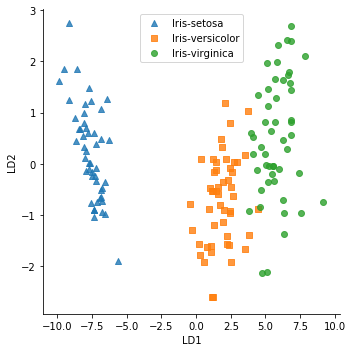

In [446]:
lda = LinearDiscriminantAnalysis(n_components = 2)
# passing features as an input and class as an output
X_vals = lda.fit(X,y)
# we know that for LDA, we get two parameters ld1 and ld2, so X_vals contains ld1 and ld2
X_vals = X_vals.transform(X)
# making a final dataframe contain X_vals and corresponding y values
lda_final = pd.DataFrame(X_vals)
lda_final['class'] = y
lda_final.columns=["LD1","LD2","class"]
# plotting the graph LD1 vs LD2
markers = ['^', 's', 'o']
sns.lmplot(x="LD1", y="LD2", data = lda_final, hue = 'class', markers = markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()


# Problem 2 (2):

## Importing Libraries

In [447]:
from numpy import log, dot, e
from sklearn.model_selection import KFold
import random
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

## Reading and scaling the dataset

In [448]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
headers = ['id', 'type', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
bc = pd.read_csv(url,names = headers)

# Replacing M with 1 and B with 0 for simplicity
bc = bc.replace('M',1)
bc = bc.replace('B',0)

# Converting to array for scaling
temp = bc[bc.columns[1:2]]
temp = temp.to_numpy().reshape(len(temp))
temp2 = bc[bc.columns[2:]]
temp2 = temp2.to_numpy()

## Defining our custom Logistic Regression with Stochastic and Mini-Batch gradient descent

## Stochastic Gradient Descent:

In [449]:
class LogisticRS:
    
    # defining instance variables 
    def __init__(self, lr = 0.0001, iters = 9000):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # initialize paramenters
        samples, features = X.shape
        # initializing weights to zero
        self.weights = np.zeros(features)
        self.bias = 0
        #for graph plotting purposes
        cost_list = []
        epoch_list = []
        
        # stochastic gradient descent algorithm
        for i in range(self.iters):
            # picking a random index
            r_index = random.randint(0,samples - 1)
            # getting data for that particular index
            sample_x = X[r_index]
            sample_y = y[r_index]
            # getting value for the logistic regression equation
            linear_model = np.dot(sample_x, self.weights) + self.bias
            # applying sigmoid to the value
            y_pred = self._sigmoid(linear_model)
            # getting derivative
            dw = (1/samples) * np.dot(sample_x.T,y_pred - sample_y)
            db = (1/samples) * np.sum(y_pred - sample_y)
            # updating the weights accordingly
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            # cost function
            cost = np.square(sample_y-y_pred)
        
            if i%100==0: # at every 100th iteration record the cost and iters value
                cost_list.append(cost)
                epoch_list.append(i)
                
        
        return cost_list,epoch_list
        
    def predict(self, X):
        # predicting according to the obtained weights
        linear_model = np.dot(X, self.weights) + self.bias
        #applying sigmoid
        y_pred = self._sigmoid(linear_model)
        # assigns 1 if pred value is more than 0.5 and 0 otherwise
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls
        
    def _sigmoid(self, x):
        # simple sigmoid function
        return 1/(1 + np.exp(-x))

## Using the defined model:

LR classification accuracy: 0.8829787234042553
Precision: 0.962
Recall: 0.718
Accuracy: 0.883
accuracy of each fold - [0.8263157894736842, 0.8842105263157894, 0.9153439153439153]
Avg accuracy : 0.8752900770444629


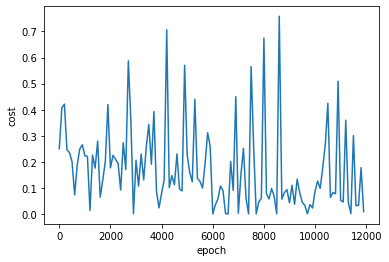

In [450]:
if __name__ == "__main__":
    # obtaining normal accuracy of the model
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    # temp2 and temp are data and target values 
    X, y = temp2,temp
    X_train, X_test, y_train, y_test = train_test_split(temp2, temp, test_size=0.33, random_state=1234)

    # can change lr and iters to obtain different results
    regressor = LogisticRS(lr = 0.0001, iters=12000)
    axisx,axisy = regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("LR classification accuracy:", accuracy(y_test, predictions))
    
    # Confusion matrix and different scores
    cm = [[0,0],[0,0]]
    
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i] == 0):
            cm[0][0] += 1
        if(y_test[i] == 0 and predictions[i] == 1):
            cm[0][1] += 1
        if(y_test[i] == 1 and predictions[i] == 0):
            cm[1][0] += 1
        if(y_test[i] == 1 and predictions[i] == 1):
            cm[1][1] += 1
            
    # true negative, false positive, false negative, true positive
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    
    precision_score = tp/(fp + tp)
    recall_score = tp/(fn + tp)
    accu_score = (tp + tn)/(tp + fn + tn + fp)
    print('Precision: %.3f' % precision_score)
    print('Recall: %.3f' % recall_score)
    print('Accuracy: %.3f' % accu_score)
    
    
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(axisy,axisx)
    
    #cross validation
    kf = KFold(n_splits=3, random_state=None)
    
    acc_score = []
 
    for train , test in kf.split(X):
        X_train , X_test = X[train,:],X[test,:]
        y_train , y_test = y[train] , y[test]
     
        regressor.fit(X_train,y_train)
        pred_values = regressor.predict(X_test)
     
        acc = accuracy(pred_values, y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/3
 
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))

## Mini-Batch Gradient Descent:

In [451]:
class LogisticRM:
    
    # defining instance variables
    def __init__(self, lr = 0.0001, iters = 100, batch_size = 10):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
    
    def fit(self, X, y):
        # initialize paramenters
        samples, features = X.shape
        # initially we set all weights equal to 0 and bias equal to 0
        self.weights = np.zeros(features)
        self.bias = 0
        # for graph plotting purposes
        cost_list = []
        epoch_list = []
        # mini-batch gradient descent algorithm
        for i in range(self.iters):
            # basically just shuffling our dataset
            r_indices = np.random.permutation(samples)
            sample_x = X[r_indices]
            sample_y = y[r_indices]
            
            # iterating all of the data in small batches
            for j in range(0,samples,self.batch_size):
                Xt = sample_x[j:j+self.batch_size]
                yt = sample_y[j:j+self.batch_size]
                
                # forming the linear logistic regression equation
                linear_model = np.dot(Xt, self.weights) + self.bias
                
                # getting the sigmoid values for linear_model
                y_pred = self._sigmoid(linear_model)
                
                # this is the derivative part
                dw = (1/samples) * np.dot(Xt.T,y_pred - yt)
                db = (1/samples) * np.sum(y_pred - yt)
                
                # updating the weights
                self.weights -= self.lr*dw
                self.bias -= self.lr*db
                
                # MSE of costs
                cost = np.mean(np.square(yt-y_pred))
        
            if i%10==0: # at every 10th iteration record the cost and iters value
                cost_list.append(cost)
                epoch_list.append(i)
                
        
        return cost_list,epoch_list
        
    def predict(self, X):
        # for testing the model
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        # assigns 1 for pred value more than 0.5 and 0 otherwise
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls
        
    def _sigmoid(self, x):
        # simple sigmoid function
        return 1/(1 + np.exp(-x))

## Using the defined model:

LR classification accuracy: 0.9202127659574468
Precision: 0.952
Recall: 0.831
Accuracy: 0.920
accuracy of each fold - [0.9052631578947369, 0.9210526315789473, 0.9312169312169312]
Avg accuracy : 0.9191775735635385


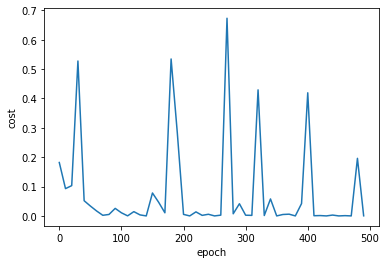

In [452]:
if __name__ == "__main__":
    # simple accuracy function for predictions
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    # temp2 and temp are data and target variable respectively
    X, y = temp2,temp
    X_train, X_test, y_train, y_test = train_test_split(temp2, temp, test_size=0.33, random_state=1234)

    # for simplicity purposes don't enter batch_size greater than the sample size 
    regressor = LogisticRM(lr = 0.0001, iters=500, batch_size = 20)
    axisx,axisy = regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("LR classification accuracy:", accuracy(y_test, predictions))
    
    
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(axisy,axisx)
    
    # Confusion matrix and different scores
    cm = [[0,0],[0,0]]
    
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i] == 0):
            cm[0][0] += 1
        if(y_test[i] == 0 and predictions[i] == 1):
            cm[0][1] += 1
        if(y_test[i] == 1 and predictions[i] == 0):
            cm[1][0] += 1
        if(y_test[i] == 1 and predictions[i] == 1):
            cm[1][1] += 1
            
    # true negative, false positive, false negative, true positive
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    
    precision_score = tp/(fp + tp)
    recall_score = tp/(fn + tp)
    accu_score = (tp + tn)/(tp + fn + tn + fp)
    print('Precision: %.3f' % precision_score)
    print('Recall: %.3f' % recall_score)
    print('Accuracy: %.3f' % accu_score)
    
    
    # cross validation
    kf = KFold(n_splits=3, random_state=None)
    
    acc_score = []
 
    for train , test in kf.split(X):
        X_train , X_test = X[train,:],X[test,:]
        y_train , y_test = y[train] , y[test]
     
        regressor.fit(X_train,y_train)
        pred_values = regressor.predict(X_test)
     
        acc = accuracy(pred_values , y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/3
 
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))